## Download and prepare the dataset

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow import random
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


random.set_seed(1024)

In [25]:
'''(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 32, 32, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 32, 32, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)'''

"(train_images, train_labels), (test_images, test_labels) = mnist.load_data()\n\ntrain_images = train_images.reshape((60000, 32, 32, 1))\ntrain_images = train_images.astype('float32') / 255\n\ntest_images = test_images.reshape((10000, 32, 32, 1))\ntest_images = test_images.astype('float32') / 255\n\ntrain_labels = to_categorical(train_labels)\ntest_labels = to_categorical(test_labels)"

In [26]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

train_images = tf.expand_dims(train_images, 3)
test_images = tf.expand_dims(test_images, 3)

In [27]:
print(test_images.shape, )

(10000, 28, 28, 1)


In [28]:
print(len(train_images),len(train_labels), len(test_images), len(test_labels))

60000 60000 10000 10000


## Define the model

In [29]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=train_images[0].shape, padding='same'), #C1
    keras.layers.MaxPooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.MaxPooling2D(), #S4
    keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C5
    keras.layers.Flatten(), #Flatten    
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [30]:
lenet_5_model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [31]:
history = lenet_5_model.fit(train_images, train_labels, epochs=10, validation_split=0.1, shuffle=False)

Epoch 1/10
1688/1688 [==============================] - 25s 14ms/step - loss: 0.1721 - accuracy: 0.9491 - val_loss: 0.0769 - val_accuracy: 0.9783
Epoch 2/10
1688/1688 [==============================] - 22s 13ms/step - loss: 0.0624 - accuracy: 0.9815 - val_loss: 0.0572 - val_accuracy: 0.9845
Epoch 3/10
1688/1688 [==============================] - 22s 13ms/step - loss: 0.0407 - accuracy: 0.9875 - val_loss: 0.0509 - val_accuracy: 0.9862
Epoch 4/10
1688/1688 [==============================] - 26s 16ms/step - loss: 0.0270 - accuracy: 0.9919 - val_loss: 0.0539 - val_accuracy: 0.9865
Epoch 5/10
1688/1688 [==============================] - 22s 13ms/step - loss: 0.0206 - accuracy: 0.9937 - val_loss: 0.0556 - val_accuracy: 0.9865
Epoch 6/10
1688/1688 [==============================] - 22s 13ms/step - loss: 0.0177 - accuracy: 0.9943 - val_loss: 0.0497 - val_accuracy: 0.9870
Epoch 7/10
1688/1688 [==============================] - 22s 13ms/step - loss: 0.0136 - accuracy: 0.9958 - val_loss: 0.0557 -

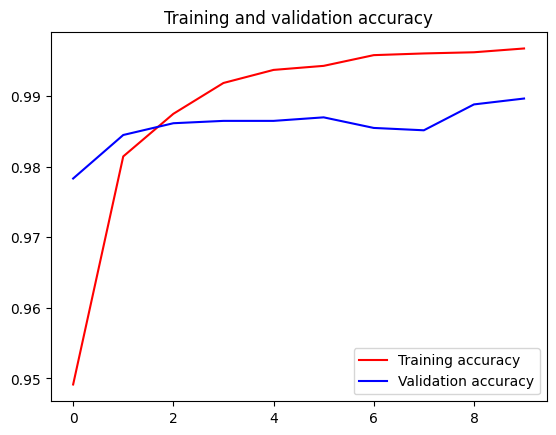

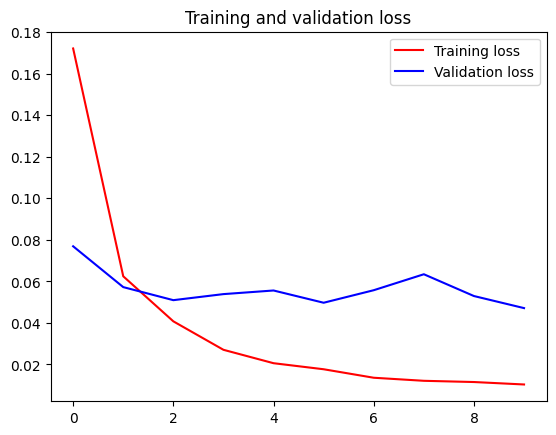

In [32]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##  Evaluating the model on the test set

In [33]:
test_loss, test_acc = lenet_5_model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.0406 - accuracy: 0.9890
